In [1]:
import pickle
from keras.utils import to_categorical
import cv2 
import numpy as np

train = 'train.p'
valid = 'valid.p'
test  = 'test.p'

with open(train, mode='rb') as f:
    train = pickle.load(f)
with open(valid, mode='rb') as f:
    valid = pickle.load(f)
with open(test, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)
y_test=to_categorical(y_test)



In [2]:
def preprocessing(img): 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.equalizeHist(img) 
    img = img / 255
    return img 
  
X_train = np.array(list(map(preprocessing, X_train))) 
X_valid = np.array(list(map(preprocessing, X_valid))) 
X_test = np.array(list(map(preprocessing, X_test))) 
  
X_train = X_train.reshape(34799, 32, 32, 1) 
X_valid = X_valid.reshape(4410, 32, 32, 1) 
X_test = X_test.reshape(12630, 32, 32, 1)

In [3]:
print((X_train.shape,y_train.shape))
print((X_valid.shape,y_valid.shape))
print((X_test.shape,y_test.shape))

((34799, 32, 32, 1), (34799, 43))
((4410, 32, 32, 1), (4410, 43))
((12630, 32, 32, 1), (12630, 43))


In [9]:
import tensorflow.keras
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 96)          11712     
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_10 (Activation)   (None, 4, 4, 256)        

In [10]:
AlexNet.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [11]:
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_accuracy',   factor=.01,   patience=3,  min_lr=1e-5)

In [12]:
#Defining the parameters
batch_size= 128
epochs=30
learn_rate=.001


In [13]:
#Training the model
train = AlexNet.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs, batch_size=batch_size, verbose=1, callbacks = [lrr])

Epoch 1/30
272/272 [==============================] - 158s 574ms/step - loss: 2.2838 - accuracy: 0.4459 - val_loss: 3.9346 - val_accuracy: 0.0340
Epoch 2/30
272/272 [==============================] - 159s 586ms/step - loss: 0.6303 - accuracy: 0.8733 - val_loss: 3.5218 - val_accuracy: 0.1304
Epoch 3/30
272/272 [==============================] - 163s 599ms/step - loss: 0.3887 - accuracy: 0.9227 - val_loss: 3.1265 - val_accuracy: 0.2585
Epoch 4/30
272/272 [==============================] - 154s 568ms/step - loss: 0.2753 - accuracy: 0.9465 - val_loss: 2.9098 - val_accuracy: 0.3079
Epoch 5/30
272/272 [==============================] - 153s 563ms/step - loss: 0.2266 - accuracy: 0.9533 - val_loss: 3.1466 - val_accuracy: 0.2363
Epoch 6/30
272/272 [==============================] - 157s 578ms/step - loss: 0.1742 - accuracy: 0.9632 - val_loss: 3.9467 - val_accuracy: 0.1354
Epoch 7/30
272/272 [==============================] - 154s 567ms/step - loss: 0.1606 - accuracy: 0.9647 - val_loss: 3.0632 -

In [14]:
from sklearn.metrics import accuracy_score
import numpy as np
y_pred=AlexNet.predict_classes(X_test)
y_true=np.argmax(y_test,axis=1)
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

C:\Users\Pushkar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy Score =  0.8935075217735551


In [15]:
from keras.models import load_model
AlexNet.save("alexnet.h5")


In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (32, 32, 1), activation = 'relu'))
model.add(Flatten())
model.add(Dense(43, activation = 'softmax'))

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 43)                1238443   
Total params: 1,238,763
Trainable params: 1,238,763
Non-trainable params: 0
_________________________________________________________________


In [19]:
train = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128, verbose=1)

Epoch 1/30
272/272 [==============================] - 6s 22ms/step - loss: 1.8732 - accuracy: 0.5319 - val_loss: 0.7072 - val_accuracy: 0.7957
Epoch 2/30
272/272 [==============================] - 6s 20ms/step - loss: 0.3197 - accuracy: 0.9226 - val_loss: 0.5910 - val_accuracy: 0.8379
Epoch 3/30
272/272 [==============================] - 6s 20ms/step - loss: 0.1717 - accuracy: 0.9622 - val_loss: 0.5299 - val_accuracy: 0.8556
Epoch 4/30
272/272 [==============================] - 6s 20ms/step - loss: 0.1058 - accuracy: 0.9769 - val_loss: 0.5142 - val_accuracy: 0.8628
Epoch 5/30
272/272 [==============================] - 6s 20ms/step - loss: 0.0712 - accuracy: 0.9867 - val_loss: 0.5149 - val_accuracy: 0.8621
Epoch 6/30
272/272 [==============================] - 5s 20ms/step - loss: 0.0551 - accuracy: 0.9894 - val_loss: 0.5356 - val_accuracy: 0.8698
Epoch 7/30
272/272 [==============================] - 5s 20ms/step - loss: 0.0369 - accuracy: 0.9922 - val_loss: 0.5386 - val_accuracy: 0.8678

In [20]:
y_pred=model.predict_classes(X_test)
y_true=np.argmax(y_test,axis=1)
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.8794140934283452


In [21]:
model.save('cnn.h5')

In [22]:
AlexNet.load_weights("alexnet.h5")
AlexNet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
Pred_conv = AlexNet.evaluate(X_test, y_test, verbose=0)
print("Results on the test data")
print(" ")
print("%s- %.2f" % (AlexNet.metrics_names[0], Pred_conv[0]))
print("%s- %.2f" % (AlexNet.metrics_names[1], Pred_conv[1]))

Results on the test data
 
loss- 0.44
accuracy- 0.89


Predicted sign: [[1.8507036e-04 9.8659027e-01 2.6548994e-04 4.7572309e-04 3.6886332e-04
  2.5950634e-04 1.9164804e-04 2.4779537e-04 4.4517475e-04 3.9723938e-04
  5.7693769e-04 3.0160995e-04 4.7257368e-04 5.3792761e-04 3.4249597e-04
  1.7740901e-04 2.3353734e-04 2.5054088e-04 6.1258831e-04 2.2550969e-04
  2.7422118e-04 2.6316222e-04 2.0595864e-04 3.6460193e-04 3.1956742e-04
  4.5771315e-04 2.2411525e-04 3.2875082e-04 2.5775959e-04 2.6182918e-04
  2.5995867e-04 3.9027282e-04 3.8178117e-04 2.2885264e-04 2.2881772e-04
  2.4708250e-04 2.0113314e-04 4.2853193e-04 4.7779936e-04 3.3205521e-04
  1.6380571e-04 3.5445663e-04 1.8981782e-04]]
---------------------------------------------------------------------------
Predicted Sign[1]


C:\Users\Pushkar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


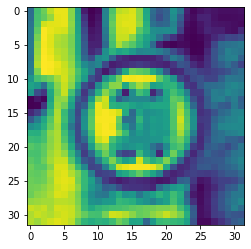

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X_test[100]) 
print("Predicted sign: "+ str( 
        AlexNet.predict(X_test[100].reshape(1, 32, 32, 1))))

print('---------------------------------------------------------------------------')

print("Predicted Sign" + str(AlexNet.predict_classes(X_test[100].reshape(1, 32, 32, 1))))

In [26]:
model.load_weights("cnn.h5")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
Pred_conv = model.evaluate(X_test, y_test, verbose=0)
print("Results on the test data")
print(" ")
print("%s- %.2f" % (model.metrics_names[0], Pred_conv[0]))
print("%s- %.2f" % (model.metrics_names[1], Pred_conv[1]))

Results on the test data
 
loss- 0.92
accuracy- 0.88


Predicted sign: [[9.2427795e-15 1.0000000e+00 5.4480087e-10 6.6493527e-23 5.3396341e-12
  9.7066685e-20 1.0102144e-22 6.0598921e-17 2.6691042e-15 9.3678521e-26
  8.5704585e-26 1.1638153e-21 9.0475163e-18 3.6928236e-25 1.6086846e-25
  1.3289153e-22 1.6495773e-22 9.8729808e-24 7.5182924e-20 1.4514908e-26
  4.7836024e-21 5.0386001e-19 2.0812495e-28 3.1533889e-26 7.0736557e-18
  4.4783997e-26 1.7199712e-25 7.3532948e-21 1.0170978e-21 1.3016040e-19
  4.6852267e-23 2.9083029e-15 1.5259157e-25 4.9317116e-26 1.8817815e-27
  2.5007949e-34 4.9501323e-31 4.4601156e-22 2.0727774e-30 2.0298178e-24
  1.2631052e-09 3.9953351e-31 6.3901058e-24]]
---------------------------------------------------------------------------
Predicted Sign[1]


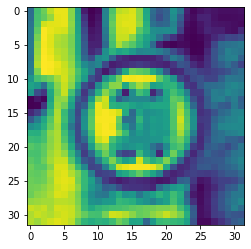

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_test[100]) 
print("Predicted sign: "+ str( 
        model.predict(X_test[100].reshape(1, 32, 32, 1))))

print('---------------------------------------------------------------------------')

print("Predicted Sign" + str(model.predict_classes(X_test[100].reshape(1, 32, 32, 1))))

In [30]:
from tensorflow.keras.models import load_model

import cv2

import numpy as np

final_model = load_model('cnn.h5')

img = cv2.imread(r".\Test Random Images\80 ends.jpg")
#print(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

img = img/ 255
#print(img)

img = cv2.resize(img,(32,32))
print(img)
img = np.reshape(img,[1,32,32,1])

classes = final_model.predict_classes(img)

print(classes)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 0.91363358 0.99779412 1.        ]
 [1.         1.         0.97411152 ... 1.         0.99842218 1.        ]
 ...
 [1.         0.9459712  1.         ... 0.99609375 1.         1.        ]
 [1.         1.         0.99888174 ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[6]
